# SALES PREDICTION USING PYTHON

Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, 
the segment of people you advertise for, or the platform you are advertising on about your product.
Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product.
So let's start the task of sales prediction with machine learning using Python.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
#Load the data

df=pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
#print First 5 rows only
df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#print the all the columns name
print(df.columns)

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [5]:
#print the datatypes of each column
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [6]:
df.shape

(200, 5)

In [7]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
#Drop the Unnamed:0 column 

df=df.drop('Unnamed: 0',axis=1)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [10]:
#Check for Missing vales
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: >

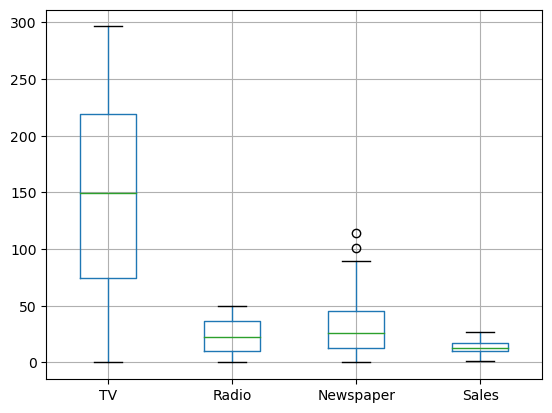

In [11]:
df.boxplot()

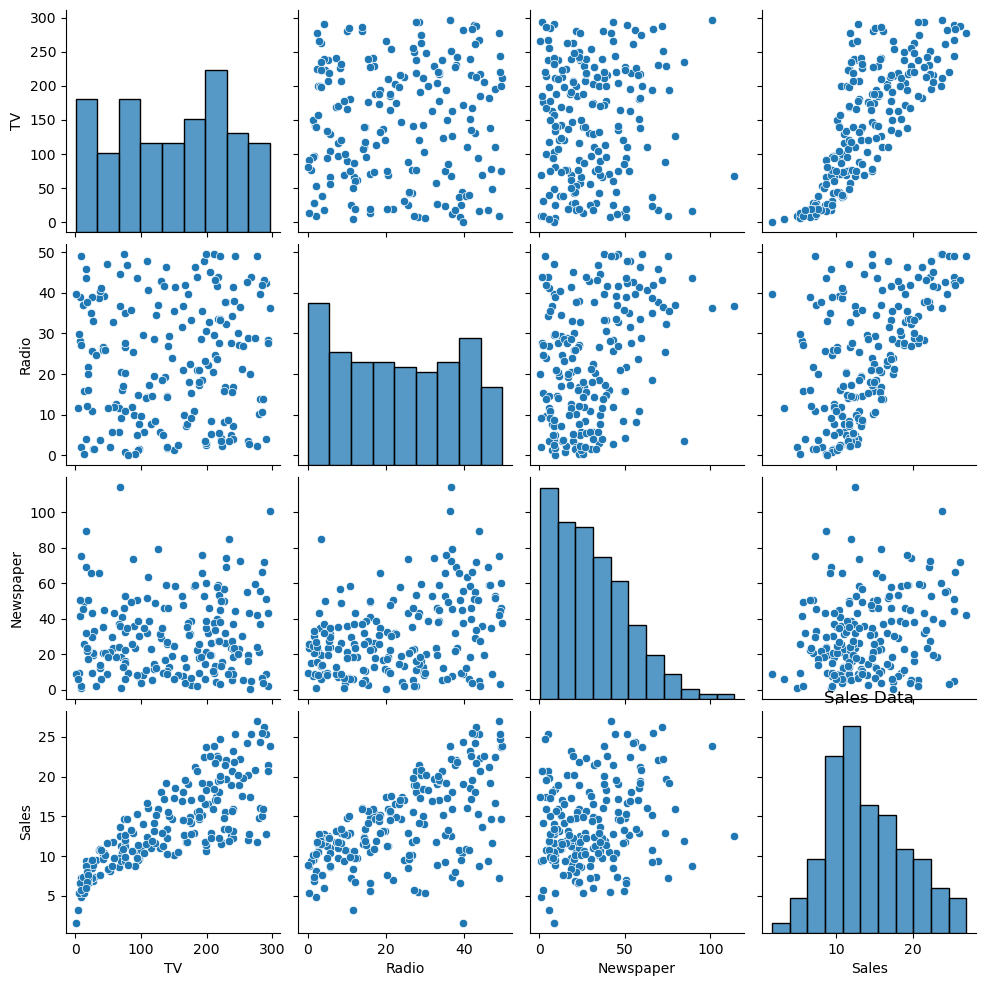

In [12]:
#Exploratory data Analysis
#Display Pairplot of give dataframe
sns.pairplot(df)
plt.title("Sales Data")
plt.show()

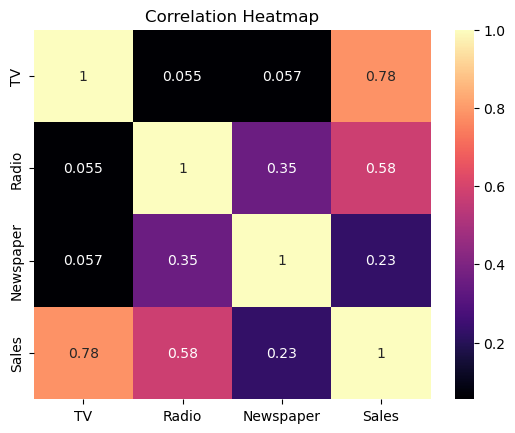

In [13]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='magma')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
#define features and target variable
x=df.drop('Sales',axis=1)
y=df['Sales']

In [15]:
#Feature Scaling
scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

In [16]:
#Split the data into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [17]:
#Train the model
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [18]:
#make Predictions
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)

Mean Squared Error: 3.1740973539761064


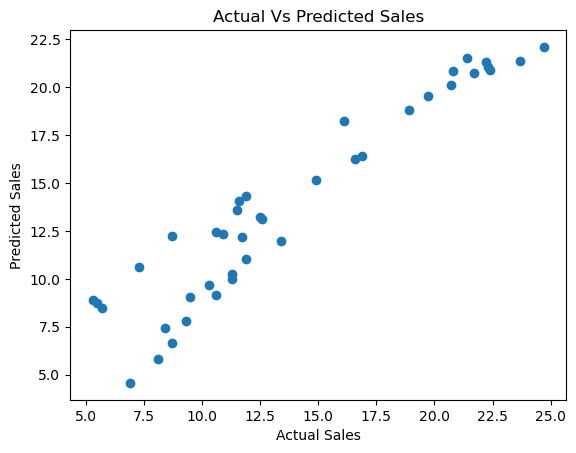

In [19]:
#Plot Actual Sales and Predicted Sales

plt.scatter(y_test,y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Vs Predicted Sales')
plt.show()

In [20]:
#New advertising data for Prediction

df1= {
    'TV':[201],
    'Radio':[75],
    'Newspaper':[20]
}

df1

{'TV': [201], 'Radio': [75], 'Newspaper': [20]}

In [21]:
data=pd.DataFrame(df1)
data

,TV,Radio,Newspaper
0,201,75,20


In [22]:
# Scale the new data
data_scaled = scaler.transform(data)
data_scaled

array([[ 0.63005513,  3.49339891, -0.48581976]])

In [23]:
#make Prediction
pred_sales= model.predict(data_scaled)
pred_sales[0]

26.2145517037402